In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The descriptions below about the columns in the dataset was obtained from ChatGPT therefore, some may not be appropriate represenations.

1. `MachineID`: A unique identifier or serial number for each car.
2. `ModelID`: An identifier for the car's specific model.
3. `fiModelDesc`: A textual description of the car's model.
4. `fiBaseModel`: The base model of the car, which may include variations or trims.
5. `fiProductClassDesc`: A description of the product class to which the car belongs (e.g., compact, SUV, sedan, etc.).
6. `ProductGroup`: A categorization of the car into a specific product group (e.g., construction equipment, trucks, etc.).
7. `ProductGroupDesc`: A description of the product group.
8. `MfgYear`: The year in which the car was manufactured.
9. `fiManufacturerID`: An identifier for the car's manufacturer.
10. `fiManufacturerDesc`: A description of the car's manufacturer.
11. `PrimarySizeBasis`: The basis for determining the car's primary size (e.g., weight, dimensions).
12. `PrimaryLower`: Lower limit or value related to the car's primary size.
13. `PrimaryUpper`: Upper limit or value related to the car's primary size.

These columns provide information about the car's characteristics, including its model, manufacturer, year of manufacture, size specifications, and product classification. They can be valuable for analyzing and categorizing cars in the dataset, as well as for conducting various types of research and analysis related to the automotive industry.

In [2]:
df=pd.read_csv('Machine_Appendix.csv')
df.head()

,MachineID,ModelID,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,fiProductClassDesc,ProductGroup,ProductGroupDesc,MfgYear,fiManufacturerID,fiManufacturerDesc,PrimarySizeBasis,PrimaryLower,PrimaryUpper
0,113,1355,350L,350,NaN,NaN,L,"Hydraulic Excavator, Track - 50.0 to 66.0 Metr...",TEX,Track Excavators,1994.0,26,Caterpillar,Weight - Metric Tons,50.0,66.0
1,434,3538,416C,416,C,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,BL,Backhoe Loaders,1997.0,26,Caterpillar,Standard Digging Depth - Ft,14.0,15.0
2,534,3538,416C,416,C,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,BL,Backhoe Loaders,1998.0,26,Caterpillar,Standard Digging Depth - Ft,14.0,15.0
3,718,3538,416C,416,C,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,BL,Backhoe Loaders,2000.0,26,Caterpillar,Standard Digging Depth - Ft,14.0,15.0
4,1753,1580,D5GLGP,D5,G,NaN,LGP,"Track Type Tractor, Dozer - 85.0 to 105.0 Hors...",TTT,Track Type Tractors,2006.0,26,Caterpillar,Horsepower,85.0,105.0


In [3]:
df.shape

(358593, 16)

### Data Cleaning

1. Load the dataset and perform exploratory data analysis (EDA).
2. Identify and handle missing values appropriately.
3. Detect and handle outliers.
4. Ensure data types are appropriate for analysis.
5. Present a clean dataset for analysis.

#### Handling Data types

In [4]:
#check the dtypes of the columns
df.dtypes

MachineID               int64
ModelID                 int64
fiModelDesc            object
fiBaseModel            object
fiSecondaryDesc        object
fiModelSeries          object
fiModelDescriptor      object
fiProductClassDesc     object
ProductGroup           object
ProductGroupDesc       object
MfgYear               float64
fiManufacturerID        int64
fiManufacturerDesc     object
PrimarySizeBasis       object
PrimaryLower          float64
PrimaryUpper          float64
dtype: object

In [6]:
#MachineID, ModelID, fiManufactureID should be objects, not integers

df[['MachineID','ModelID','fiManufacturerID']]=df[['MachineID','ModelID','fiManufacturerID']].astype('object')

In [7]:
df.dtypes

MachineID              object
ModelID                object
fiModelDesc            object
fiBaseModel            object
fiSecondaryDesc        object
fiModelSeries          object
fiModelDescriptor      object
fiProductClassDesc     object
ProductGroup           object
ProductGroupDesc       object
MfgYear               float64
fiManufacturerID       object
fiManufacturerDesc     object
PrimarySizeBasis       object
PrimaryLower          float64
PrimaryUpper          float64
dtype: object

In [35]:
#all datatypes loaded appropriately

#### Handling Missing Values

In [8]:
#check for the number of missing values in each colum
#calculate the percentages
df.isna().mean()

MachineID             0.000000
ModelID               0.000000
fiModelDesc           0.000000
fiBaseModel           0.000000
fiSecondaryDesc       0.339535
fiModelSeries         0.868455
fiModelDescriptor     0.820036
fiProductClassDesc    0.000000
ProductGroup          0.000000
ProductGroupDesc      0.000000
MfgYear               0.000647
fiManufacturerID      0.000000
fiManufacturerDesc    0.000000
PrimarySizeBasis      0.013363
PrimaryLower          0.013363
PrimaryUpper          0.013363
dtype: float64

In [ ]:
#columns to drop

#fiSecondaryDesc - 33% missing values,
#fiModelSeries - 87% missing values,
#fiModelDescriptor - 82% missing values,

#columns to replace missing values



#since the following columns below have the same number of missing values, or very few,
#drop the rows with missing values

#PrimarySizeBasis - drop rows
#PrimaryLower - drop rows
#PrimaryUpper - drop rows
#MfgYear - drop rows

In [9]:
#droping columns
df.drop(columns=['fiSecondaryDesc','fiModelSeries','fiModelDescriptor'], inplace=True)
df.shape

(358593, 13)

In [10]:
#dropping rows with missing values
df.dropna(subset=['PrimarySizeBasis','PrimaryLower','PrimaryUpper','MfgYear'],inplace=True)

In [11]:
df.isna().mean()

MachineID             0.0
ModelID               0.0
fiModelDesc           0.0
fiBaseModel           0.0
fiProductClassDesc    0.0
ProductGroup          0.0
ProductGroupDesc      0.0
MfgYear               0.0
fiManufacturerID      0.0
fiManufacturerDesc    0.0
PrimarySizeBasis      0.0
PrimaryLower          0.0
PrimaryUpper          0.0
dtype: float64

In [ ]:
#missing values handled

#### Handling outliers

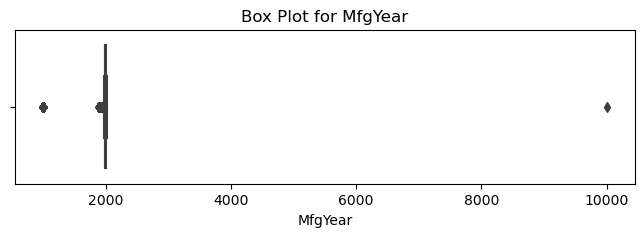

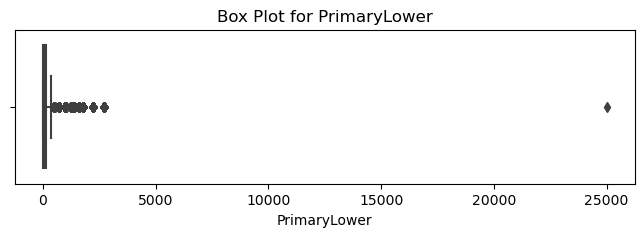

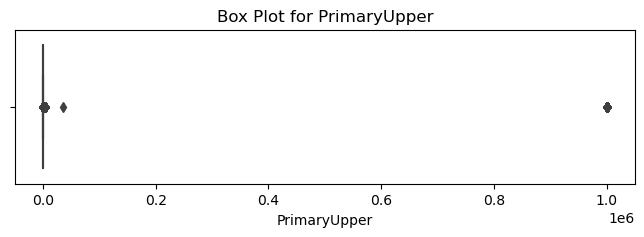

In [12]:
#select the numeric columns, and make a boxplot of them to identify outliers
numeric_cols=df.select_dtypes('number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 2))  # Create a new figure for each box plot
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

In [13]:
#MfgYear contains certain invalid years
max_year=df['MfgYear'].max()

print(f'maximum year in dataframe: {max_year}')

min_year=df['MfgYear'].min()

print(f'minimum year in dataframe: {min_year}')

print(f"length of dataframe with minimum date: {len(df[df['MfgYear']==min_year])}")
print(f"length of dataframe with maximum date: {len(df[df['MfgYear']==max_year])}")
#drop the rows with the wrong values

maximum year in dataframe: 9999.0
minimum year in dataframe: 1000.0
length of dataframe with minimum date: 21794
length of dataframe with maximum date: 1


In [14]:
#dropping rows with the wrong year
df.drop(df[(df['MfgYear']==max_year)| 
           (df['MfgYear']==min_year)].index,inplace=True)

In [ ]:
#to handle the outliers for PrimaryLower and PrimaryUpper, select the 75th percentile and drop values above it

In [15]:
df[['PrimaryUpper','PrimaryLower']].describe()

,PrimaryUpper,PrimaryLower
count,331774.000000,331774.000000
mean,51877.051757,249.562345
std,221178.077247,520.837526
min,2.000000,0.000000
25%,15.000000,14.000000
50%,85.000000,45.000000
75%,190.000000,150.000000
max,1000000.000000,25000.000000


In [16]:
#using the 75% quartile, drop the outliers, i.e PrimaryUpper > 190 and PrimaryLower >150
df=df[(df['PrimaryLower']<=150)&(df['PrimaryUpper']<=190)]

In [ ]:
#check if there are still outliers

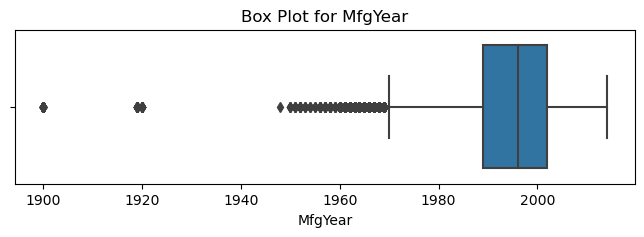

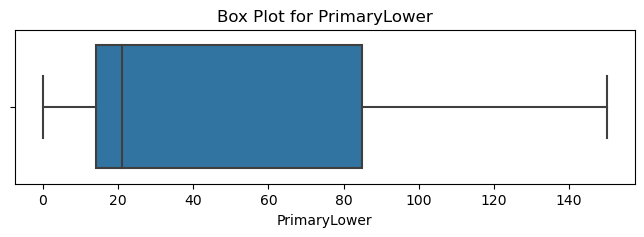

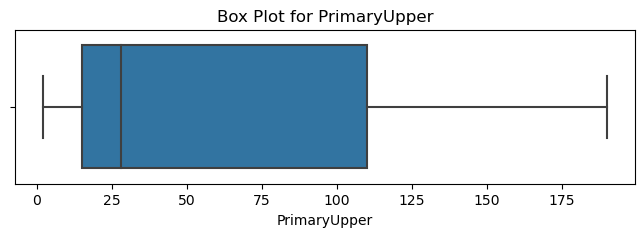

In [17]:
for col in numeric_cols:
    plt.figure(figsize=(8, 2))  # Create a new figure for each box plot
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

In [ ]:
#no more outliers, but can be ignored for manufacturing year.

In [18]:
df.shape

(246547, 13)

### Data Analysis
Using the cleaned dataset from Task 1, perform the following tasks:

6. Conduct univariate analysis on a relevant variable.
7. Create at least one meaningful data visualization to illustrate your findings.
8. Perform correlation analysis to identify relationships between variables.

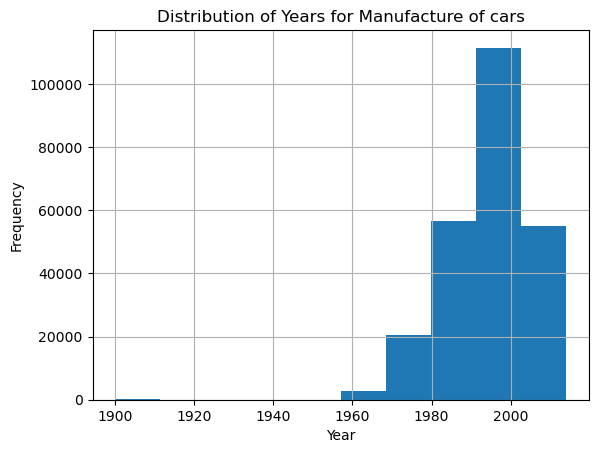

In [19]:
#check the distribution of the manufacturing year for the cars
df['MfgYear'].hist()
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years for Manufacture of cars');

In [ ]:
#most of the cars are relatively recent, from 1960 - 2014, with fewer cars below 1960.

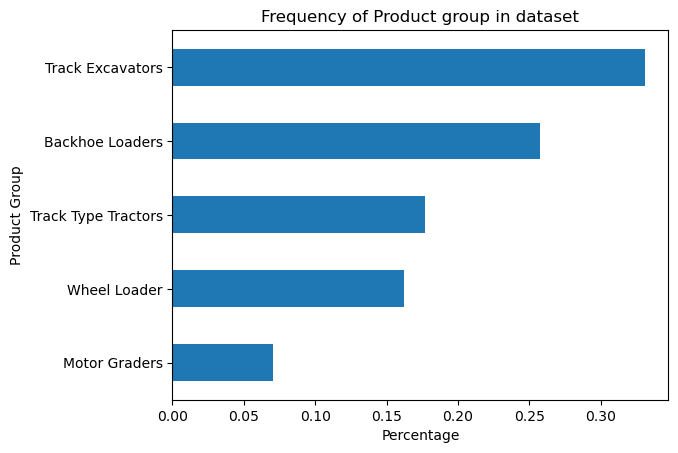

In [20]:
#what are the top 5 most common productgroup among the cars?
df['ProductGroupDesc'].value_counts(normalize=True).head().sort_values().plot(kind='barh')
plt.xlabel('Percentage')
plt.ylabel('Product Group')
plt.title('Frequency of Product group in dataset');

#these productgroups accounted for more than 90% of the cars in the dataset

In [21]:
#what is the correlation between PrimaryUpper and PrimaryLower
df[['PrimaryUpper','PrimaryLower']].corr()

#95% correlation, that makes sense because they are just boundaries 

,PrimaryUpper,PrimaryLower
PrimaryUpper,1.000000,0.958737
PrimaryLower,0.958737,1.000000


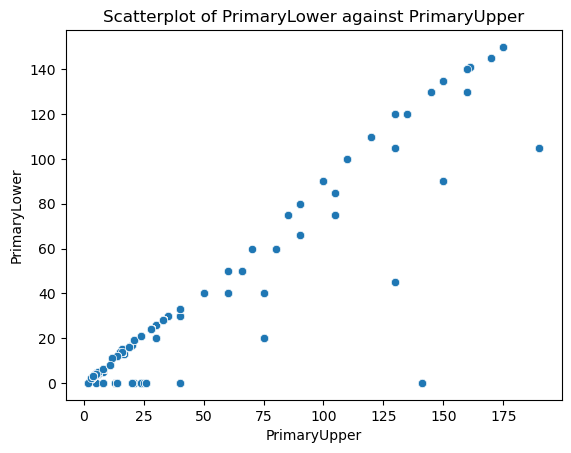

In [22]:
sns.scatterplot(x=df['PrimaryUpper'],y=df['PrimaryLower'])
plt.title('Scatterplot of PrimaryLower against PrimaryUpper');

In [24]:
#create a column for the range (difference between PrimaryLower and PrimaryUpper)

df['Range_PrUpper_Lower']=df['PrimaryUpper']-df['PrimaryLower']
df.head()

,MachineID,ModelID,fiModelDesc,fiBaseModel,fiProductClassDesc,ProductGroup,ProductGroupDesc,MfgYear,fiManufacturerID,fiManufacturerDesc,PrimarySizeBasis,PrimaryLower,PrimaryUpper,Range_PrUpper_Lower
0,113,1355,350L,350,"Hydraulic Excavator, Track - 50.0 to 66.0 Metr...",TEX,Track Excavators,1994.0,26,Caterpillar,Weight - Metric Tons,50.0,66.0,16.0
1,434,3538,416C,416,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,BL,Backhoe Loaders,1997.0,26,Caterpillar,Standard Digging Depth - Ft,14.0,15.0,1.0
2,534,3538,416C,416,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,BL,Backhoe Loaders,1998.0,26,Caterpillar,Standard Digging Depth - Ft,14.0,15.0,1.0
3,718,3538,416C,416,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,BL,Backhoe Loaders,2000.0,26,Caterpillar,Standard Digging Depth - Ft,14.0,15.0,1.0
4,1753,1580,D5GLGP,D5,"Track Type Tractor, Dozer - 85.0 to 105.0 Hors...",TTT,Track Type Tractors,2006.0,26,Caterpillar,Horsepower,85.0,105.0,20.0


In [25]:
df[['MfgYear','Range_PrUpper_Lower']].corr()

,MfgYear,Range_PrUpper_Lower
MfgYear,1.000000,-0.294735
Range_PrUpper_Lower,-0.294735,1.000000


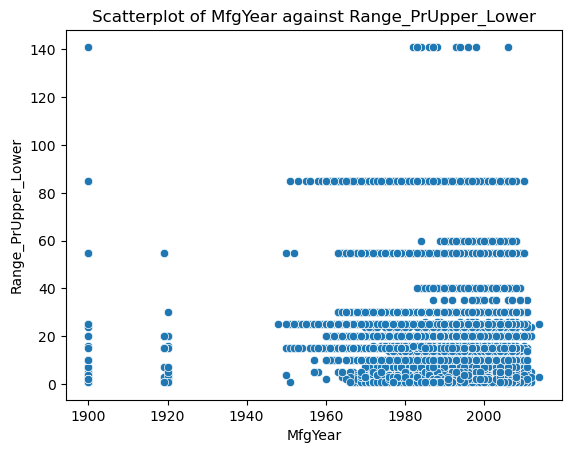

In [26]:
sns.scatterplot(x=df['MfgYear'],y=df['Range_PrUpper_Lower'])
plt.title('Scatterplot of MfgYear against Range_PrUpper_Lower');

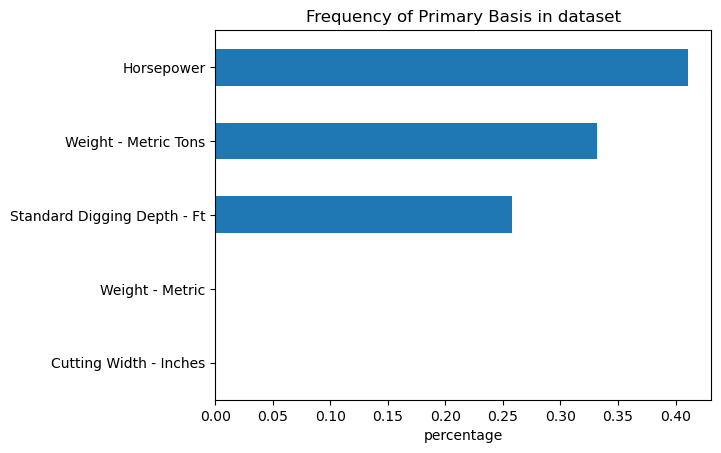

In [27]:
#what is the most common Basis for the labelling of the product? ProductGroup
df['PrimarySizeBasis'].value_counts(normalize=True).sort_values().plot(kind='barh')
plt.xlabel('percentage')
plt.title('Frequency of Primary Basis in dataset');

#horsepower is the most common metric for measurement of the cars in the dataset.

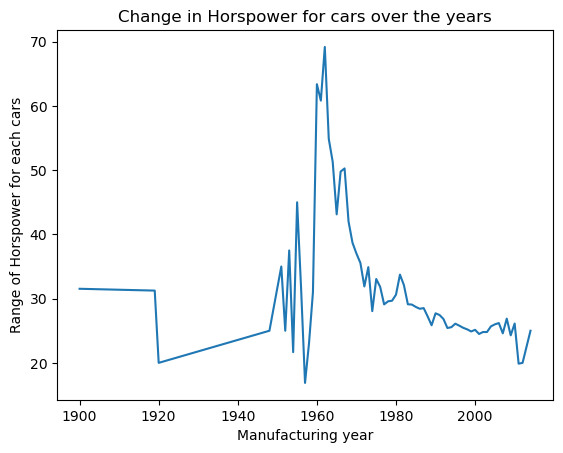

In [28]:
#Is there a relationship between Horsepower distribution in cars across the years? Has the horsepower range changed 
#as the year progress?
horse_power=df[df['PrimarySizeBasis']=='Horsepower']
horse_df=horse_power[['MfgYear','Range_PrUpper_Lower']]
horse_df.groupby('MfgYear')['Range_PrUpper_Lower'].mean().plot()
plt.xlabel('Manufacturing year')
plt.ylabel('Range of Horspower for each cars')
plt.title('Change in Horspower for cars over the years');

In [ ]:
#there seems to be a peak somewhere around 1960-1970 after which it dropped, suggesting that cars manufactured in 
#those years had more horsepower than other years

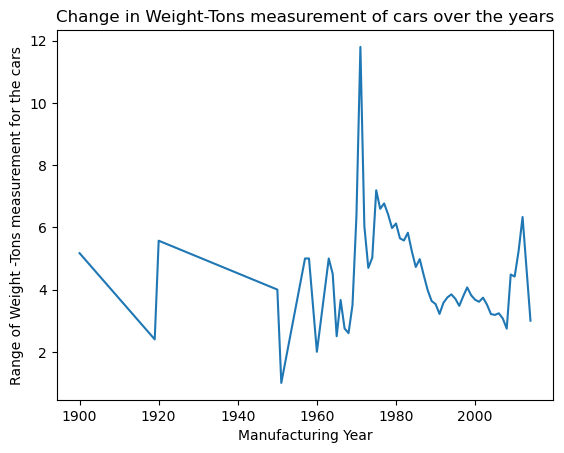

In [29]:
weight_metric=df[df['PrimarySizeBasis']=='Weight - Metric Tons']

weight_df=weight_metric[['MfgYear','Range_PrUpper_Lower']]

weight_df.groupby('MfgYear')['Range_PrUpper_Lower'].mean().plot()
plt.xlabel('Manufacturing Year')
plt.ylabel('Range of Weight -Tons measurement for the cars')
plt.title('Change in Weight-Tons measurement of cars over the years');

In [ ]:
#there seems to also be a peak around 1960 - 1970 suggesting that cars manufactured in that period had higher 
#weight (tons) measurement than cars manufactured earlier or later

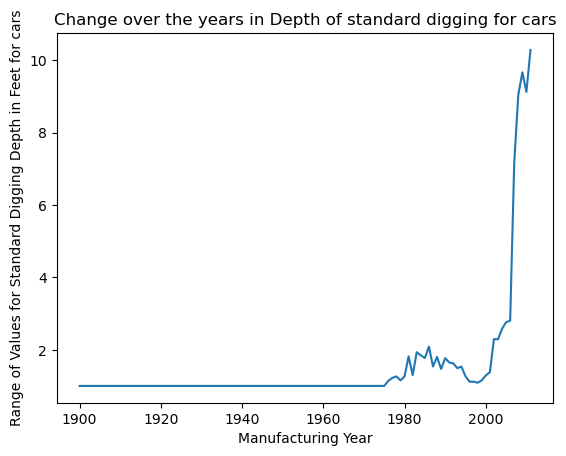

In [30]:
standard_digging=df[df['PrimarySizeBasis']=='Standard Digging Depth - Ft']

digging_df=standard_digging[['MfgYear','Range_PrUpper_Lower']]

digging_df.groupby('MfgYear')['Range_PrUpper_Lower'].mean().plot()
plt.xlabel('Manufacturing Year')
plt.ylabel('Range of Values for Standard Digging Depth in Feet for cars')
plt.title('Change over the years in Depth of standard digging for cars');

In [ ]:
#the increase in standard digging depth for cars only started to climb after 1980

### Task 3: Machine Learning
Build a basic machine learning model to predict a target variable:

9. Split the dataset into training and testing sets.
10. Choose a suitable machine learning algorithm and explain why you selected it.
11. Train the model on the training data.
12. Evaluate the model's performance on the testing data using appropriate metrics.

In [ ]:
#the target variable to predict in the machine learning model is `PrimarySizeBasis` 
#for this task, a linear regression model is selected.
# this model is chosen because the target variable to predict is a categorical variable with about 5 classes

In [31]:
df['PrimarySizeBasis'].value_counts()

Horsepower                     101230
Weight - Metric Tons            81798
Standard Digging Depth - Ft     63516
Weight - Metric                     2
Cutting Width - Inches              1
Name: PrimarySizeBasis, dtype: int64

In [ ]:
#for the sake of the model development, the poorly represented categrories (Weight - Metric) and Cutting Width (Inches)
#are dropped since they are grossly undersampled

In [32]:
#dropping highly undersampled data

#subsetting the data
undersampled=df[(df['PrimarySizeBasis']=='Weight - Metric')|
                (df['PrimarySizeBasis']=='Cutting Width - Inches')]

#dropping the rows
df.drop(undersampled.index,inplace=True)

In [33]:
#checking for duplicates
df.duplicated().sum()

0

In [34]:
#drop the columns not needed for model development
cols=['PrimarySizeBasis','PrimaryLower','PrimaryUpper','Range_PrUpper_Lower']

In [35]:
#import necessary libraries
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

In [36]:
X=df.drop(columns=cols)
y=df['PrimarySizeBasis']

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.2, random_state=42)

In [37]:
#perform ordinal encoding on the training and test dataset
encoding=OrdinalEncoder()
encoding.fit(X)

X_train=encoding.transform(X_train)
X_test=encoding.transform(X_test)

# make the model
model =LogisticRegression(max_iter=5000)

# Fit the entire pipeline on the training data
model.fit(X_train, y_train)  # The encoder learns from the training data

In [39]:
#model accuracy on the training dataset
model.score(X_train, y_train)

0.9948487844449515

In [ ]:
#model accuracy on the test dataset

In [40]:
model.score(X_test, y_test)

0.9944026445476485

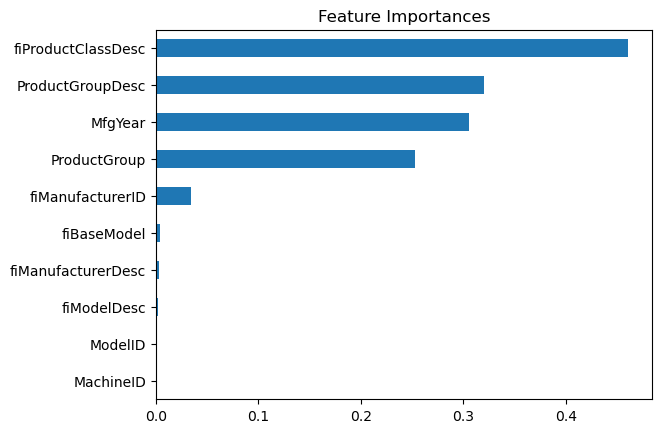

In [41]:
#find the feature importances of the columns
coefficients=np.mean(np.abs(model.coef_), axis=0)
cols=X.columns
pd.Series(coefficients, index=cols).sort_values().plot(kind='barh')
plt.title('Feature Importances');

In [ ]:
#according to the feature importances, Product class Description and Manufacture Year had the most impact in the
#model's prediction. 

#therefore, given these parameters of a car, we can predict which Primary basis to use for measuring the lower and
#upper limit.

In [42]:
from sklearn.metrics import classification_report

# make the predictions
y_pred = model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


                             precision    recall  f1-score   support

                 Horsepower       0.99      1.00      0.99     20163
Standard Digging Depth - Ft       1.00      1.00      1.00     12617
       Weight - Metric Tons       1.00      0.99      0.99     16529

                   accuracy                           0.99     49309
                  macro avg       0.99      0.99      0.99     49309
               weighted avg       0.99      0.99      0.99     49309



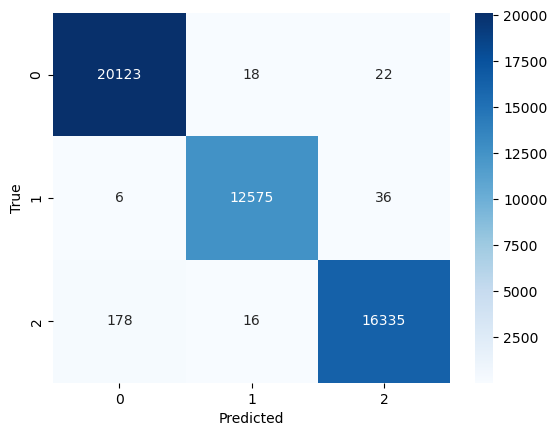

In [43]:
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
#the plot above shows the confusion matrix of the model's predictions. It made most of the right predictions.

### Summary and Conclusion
From this analysis, we can observe that the year a car was manufactured and the description of the product class influences the model's performance largely in predicting which Primary Basis will be used to obtain the lower and higher boundaries.

The distribution of the manufacturing year for the cars in the dataset shows that most cars were manufactured between 2000 and 2010.

### Limitations:
The metadata was not provided and hence a proper interpretation of the variables was not possible.

### Further Improvements (Given much time)
The model's accuracy can be finetuned to nearly 100% by hyperparameter tuning.
Further exploratory data analysis could also reveal why there was a spike in the 1960s for the cars whose primaryBasis was Weight - Metric Tons and Horsepower